## Übersichtliches NLP

In [2]:
# Importing libraries

import re
import pandas as pd
import os
import time
import codecs
import string
import re
from collections import Counter
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import Image
%matplotlib inline


import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiehamann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sophiehamann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading the text

In [3]:
# Read the text from a file
with open('/Users/sophiehamann/Documents/GitHub/woolf_text_analysis/woolf.txt', 'r') as file:
    text_woolf = file.read()

## Text Processing with the NLTK Library

### Tokenizing the text

In [4]:
tokens = word_tokenize(text_woolf)

### Removing punctuation, converting to lower case, removing stopwords

In [5]:
# Removing punctuation and convert to lowercase
cleaned_tokens = [word.lower() for word in tokens if word.isalpha()]

# Removing stopwords
stop_words = set(stopwords.words('english'))

# Extending the stopwords
# Generating a list with more stopwords I would like to delete
stopwords_extended = ["may", "would", "could", "even", "might", "shall", "'"]

# Incorporating this list into the already existing stop words set
stop_words.update(stopwords_extended)

# Filtering the tokens
tokens_woolf = [word for word in cleaned_tokens if word not in stop_words]

# Print the cleaned tokens
print(tokens_woolf[:100])

# my tokenized text is now called "tokens_woolf"

['one', 'say', 'asked', 'speak', 'women', 'fiction', 'got', 'room', 'one', 'try', 'explain', 'asked', 'speak', 'women', 'fiction', 'sat', 'banks', 'river', 'began', 'wonder', 'words', 'meant', 'mean', 'simply', 'remarks', 'fanny', 'burney', 'jane', 'austen', 'tribute', 'brontės', 'sketch', 'haworth', 'parsonage', 'snow', 'witticisms', 'possible', 'miss', 'mitford', 'respectful', 'allusion', 'george', 'eliot', 'reference', 'mrs', 'gaskell', 'one', 'done', 'second', 'sight', 'words', 'seemed', 'simple', 'title', 'women', 'fiction', 'mean', 'meant', 'mean', 'women', 'like', 'mean', 'women', 'fiction', 'write', 'mean', 'women', 'fiction', 'written', 'mean', 'somehow', 'three', 'inextricably', 'mixed', 'together', 'want', 'consider', 'light', 'began', 'consider', 'subject', 'last', 'way', 'seemed', 'interesting', 'soon', 'saw', 'one', 'fatal', 'drawback', 'never', 'able', 'come', 'conclusion', 'never', 'able', 'fulfil', 'understand', 'first', 'duty']


### Lemmatization
Reduce words to their base or root form. 
Lemmatization gives us a deeper understanding of the words than Stemming

In [6]:
# why did I decide to do lemmatization and not stemming? explain!
# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_woolf]

# Print the lemmatized tokens
print(lemmatized_tokens [:20])

['one', 'say', 'asked', 'speak', 'woman', 'fiction', 'got', 'room', 'one', 'try', 'explain', 'asked', 'speak', 'woman', 'fiction', 'sat', 'bank', 'river', 'began', 'wonder']


### We now have the tokenized corpus "tokens_woolf" and the lemmatized and tokenized corpus "lemmatized_tokens"

## Emotion Analysis
Performing sentiment analysis on a literary work like "A Room of One's Own" by Virginia Woolf can be challenging, as traditional sentiment analysis models might not capture the nuances and complexities of literary language. Instead of sentiment analysis, I wanted to consider a more nuanced approach, such as emotion analysis or theme extraction, to better understand the mood changes and overall sentiment of the text.

# NRC Emotion Lexicon
- Created by the National Research Council Candada
- comprehensive lexicon that associates words with emotions and sentiment
    - anger, fear, anticipation, trust, surprise, sadness, joy, disgust
    - positive, negative
- list of words with binary (0 or 1) annotations for each of the emotions and sentiments
    - a word might be marked as 1 for 'joy' and 'positive', indicating that it conveys these emotions/sentiments.
- widely used in sentiment analysis tasks
    - especially when an analysis requires understanding specific emotional tones in the text rather than just a general positive or negative sentiment
    - This can be particularly useful for analyzing literary texts, where emotions are rich and varied.
    - the NRC Emotion Lexicon can help in detecting these subtleties, providing a more nuanced understanding of the text.


In [7]:
# installing
!pip install NRCLex

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
from nrclex import NRCLex

In [9]:
# Read the NRC Emotion Lexicon File
nrc_lexicon = {}
with open('/Users/sophiehamann/Downloads/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as file:
    for line in file:
        word, emotion, association = line.strip().split('\t')
        if word not in nrc_lexicon:
            nrc_lexicon[word] = {}
        nrc_lexicon[word][emotion] = int(association)
        
#it worked yay
#print (nrc_lexicon)

{'aback': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'abacus': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 1}, 'abandon': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 1, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 1, 'surprise': 0, 'trust': 0}, 'abandoned': {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 1, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 1, 'surprise': 0, 'trust': 0}, 'abandonment': {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 1, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 1, 'surprise': 1, 'trust': 0}, 'abate': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}, 'abatement': {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'po

In [10]:
emotion_counts = {emotion: 0 for emotion in list(nrc_lexicon.values())[0].keys()}
for word in lemmatized_tokens:
    if word in nrc_lexicon:
        for emotion in nrc_lexicon[word]:
            emotion_counts[emotion] += nrc_lexicon[word][emotion]

In [11]:
print(emotion_counts)

{'anger': 633, 'anticipation': 990, 'disgust': 391, 'fear': 639, 'joy': 841, 'negative': 1318, 'positive': 2149, 'sadness': 655, 'surprise': 425, 'trust': 1261}


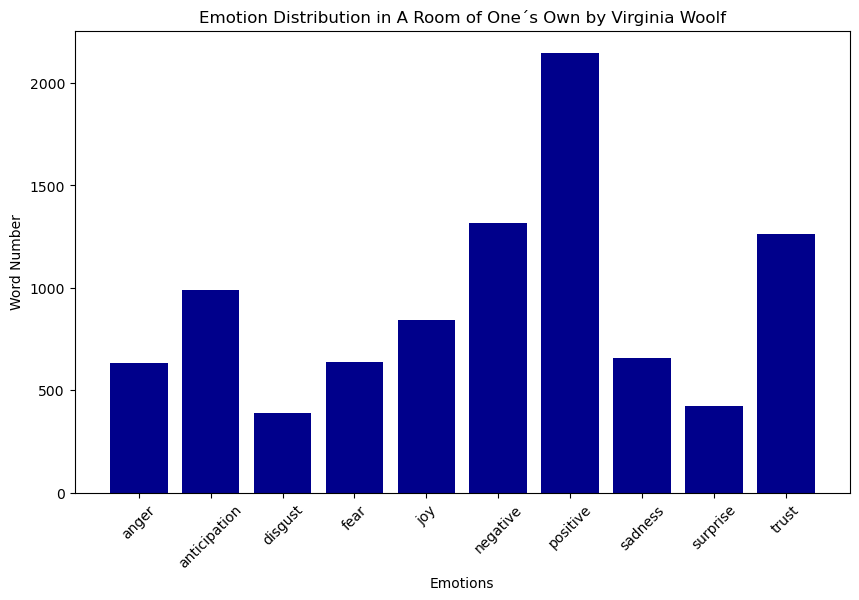

In [12]:
# das sind die tokenized words (keine tokenized sätze)
import matplotlib.pyplot as plt

#  data (replace with your actual data)
emotion_counts = {
    'anger': 633, 'anticipation': 990, 'disgust': 391,
    'fear': 639, 'joy': 841, 'negative': 1318,
    'positive': 2149, 'sadness': 655, 'surprise': 425, 'trust': 1261
}

# Preparing data for plotting
emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Creating the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size of the graph as needed
plt.bar(emotions, counts, color='darkblue')  # You can choose a different color

# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Word Number')
plt.title('Emotion Distribution in A Room of One´s Own by Virginia Woolf')
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability

# Displaying the graph
plt.savefig('Emotion_Distribution.pdf')
plt.show()

In [13]:
# sentence emotion analysis
from nltk.tokenize import sent_tokenize, word_tokenize

# Assuming you have already loaded the NRC Emotion Lexicon into 'nrc_lexicon'
# and you have your text in 'text'

# Step 1: Tokenize Text into Sentences
# explain why it is not a problem to use the raw text file here instead of the lemmatized tokens
sentences = sent_tokenize(text_woolf.lower())  # Convert text to lowercase for consistency

# Step 2: Analyze Each Sentence for Emotion
sentence_emotions = []
for sentence in sentences:
    tokenized_sentence = word_tokenize(sentence)
    emotion_counts = {emotion: 0 for emotion in list(nrc_lexicon.values())[0].keys()}
    for word in tokenized_sentence:
        if word in nrc_lexicon:
            for emotion in nrc_lexicon[word]:
                emotion_counts[emotion] += nrc_lexicon[word][emotion]
    sentence_emotions.append(emotion_counts)

# Step 3: Store and Aggregate Results
# Here you can decide how to aggregate or use the sentence-level results
# For example, you can print the emotion counts for each sentence
for i, counts in enumerate(sentence_emotions):
    print(f"Sentence {i+1}: {counts}")

Sentence 1: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
Sentence 2: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 1, 'sadness': 0, 'surprise': 0, 'trust': 1}
Sentence 3: {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
Sentence 4: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 2, 'sadness': 0, 'surprise': 0, 'trust': 1}
Sentence 5: {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 1, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
Sentence 6: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 1, 'sadness': 0, 'surprise': 0, 'trust': 1}
Sentence 7: {'anger': 1, 'anticipation': 0, 'disgust': 0, 'fear': 1, 'joy': 0, 'negative': 3, 'posit

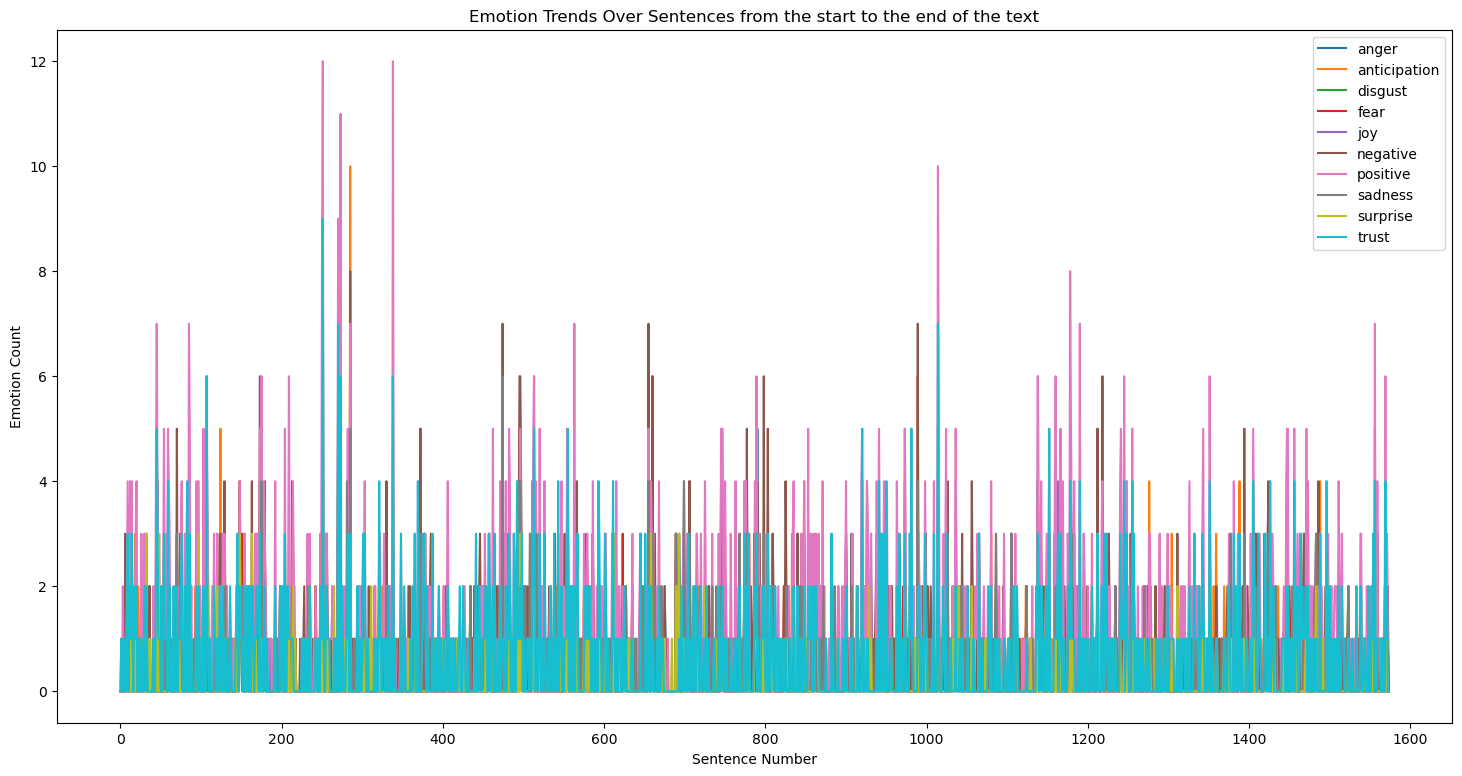

In [14]:
import matplotlib.pyplot as plt

# Assuming 'sentence_emotions' is your list of dictionaries containing emotion counts for each sentence
# Example: [{'anger': 1, 'joy': 2, ...}, {'anger': 0, 'joy': 3, ...}, ...]

# Preparing data for plotting
emotion_series = {emotion: [] for emotion in sentence_emotions[0].keys()}
for emotions in sentence_emotions:
    for emotion, count in emotions.items():
        emotion_series[emotion].append(count)

# Plotting
plt.figure(figsize=(18, 9))
for emotion, counts in emotion_series.items():
    plt.plot(counts, label=emotion)
plt.xlabel('Sentence Number')
plt.ylabel('Emotion Count')
plt.title('Emotion Trends Over Sentences from the start to the end of the text')
plt.legend()
plt.savefig('Emotion_Sentence_Distribution.pdf')
plt.show()